In [1]:
import data_smoothing

In [2]:
import smoothing_visualize

In [3]:
from peak_character import peak_matrix

In [4]:
filename = 'exp03_20180103 -t0 -chirp'
cuton_nm = 900
cutoff_nm = 1400
timezero = 1

In [5]:
nm, time, z = data_smoothing.load_data_csv(filename+'.csv', cuton_nm, cutoff_nm, timezero)

/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


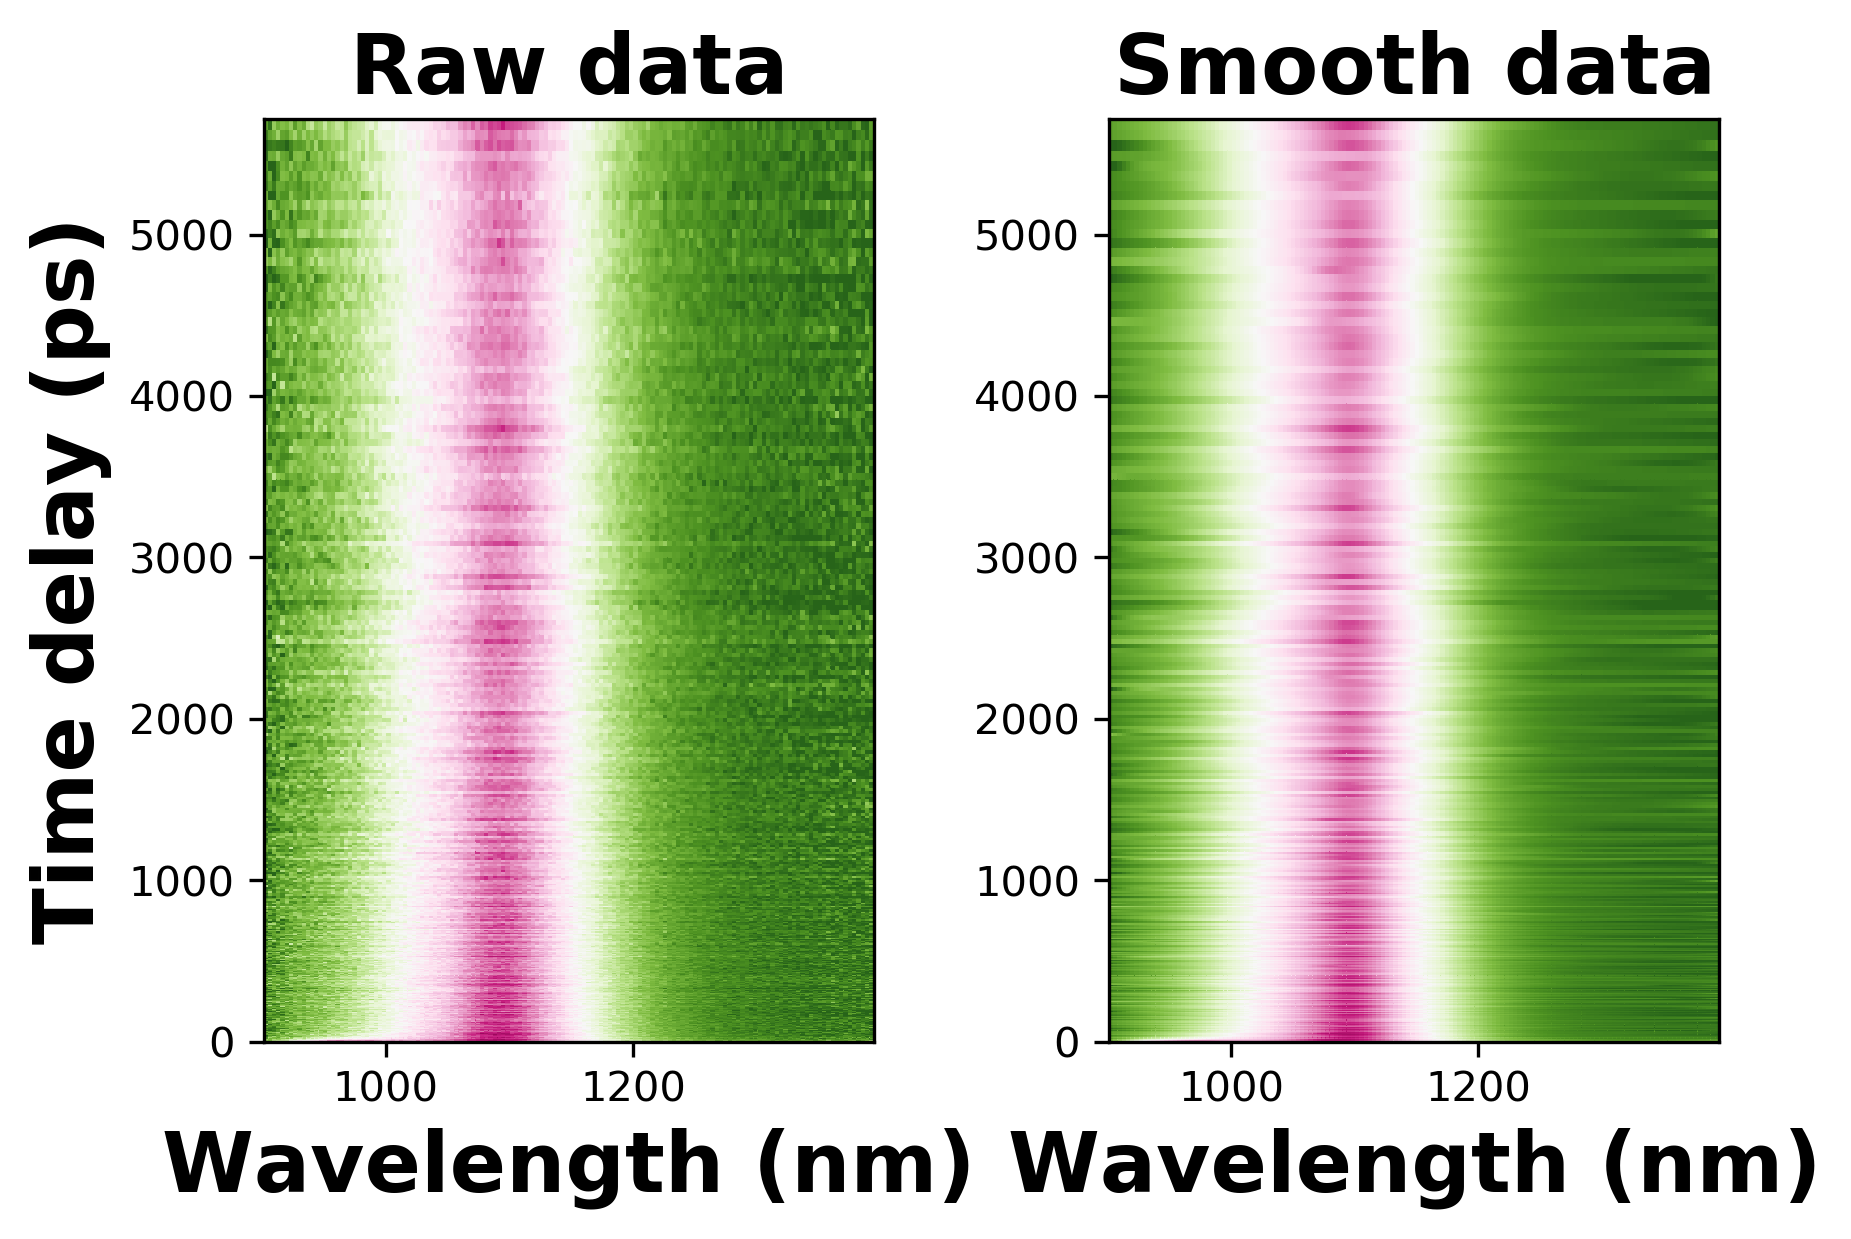

In [6]:
z_smooth = smoothing_visualize.smoothing(nm, time, z)

In [ ]:
def smoothing(nm, time, z):
    """Reduce noise in data, then visualize data before and 
    after smoothening in contour plot.
    
    Args:
        nm: wavelength array, numpy array
        time: time array, numpy array
        z: data matric, numpy array
    
    Returns:
        z_smooth: data after reducing noise, numpy array
    """
    
    #smoothing data
    z_smooth = earth_smooth_matrix(nm, z)
    
    #check data shape doesn't change
    assert np.shape(z_smooth) == np.shape(z), \
    'Unexpected change in matrix shape after smoothening'

    #contour plot of original data BEFORE smoothing
    original_contour = twodcontourplot(nm, time, z)
    nm_contour, time_contour, min_contour, max_contour = original_contour[0], original_contour[1], original_contour[2], original_contour[3]

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title('Raw data', fontsize = 16, fontweight = 'bold')
    ax1.set_xlabel('Wavelength (nm)', fontsize = 16, fontweight = 'bold')
    ax1.set_ylabel('Time delay (ps)', fontsize = 16, fontweight = 'bold')
    ax1.pcolormesh(nm_contour, time_contour, z, cmap = 'PiYG', vmin=min_contour, vmax=max_contour)

    #contour plot of data AFTER smoothing
    smooth_contour = twodcontourplot(nm, time, z_smooth)    
    nm_contour, time_contour, min_contour, max_contour = smooth_contour[0], smooth_contour[1], smooth_contour[2], smooth_contour[3]
    
    ax2.set_title('Smooth data', fontsize = 16, fontweight = 'bold')
    ax2.set_xlabel('Wavelength (nm)', fontsize = 16, fontweight = 'bold')
    ax2.set_ylabel('Time delay (ps)', fontsize = 16, fontweight = 'bold')
    ax2.pcolormesh(nm_contour, time_contour, z_smooth, cmap = 'PiYG', vmin=min_contour, vmax=max_contour)
    plt.tight_layout(pad=0.25, h_pad=None, w_pad=None, rect=None)
    plt.show()


    return z_smooth

In [8]:
def twodcontourplot(tadata_nm, tadata_timedelay, tadata_z_corr):
    """
    make contour plot
    
    Args:
        tadata_nm: wavelength array
        tadata_timedelay: time delay array
        tadata_z_corr: matrix of z values
        
    """
    nm, timedelay = np.linspace(tadata_nm.min(), tadata_nm.max(), 100), np.linspace(tadata_timedelay.min(), tadata_timedelay.max(), 100)    
    timedelayi, nmi = np.meshgrid(tadata_timedelay, tadata_nm)

    #find the maximum and minimum
    #these are used for color bar
    z_min = np.amin(np.amin(tadata_z_corr, axis = 1))
    z_max = np.amax(np.amax(tadata_z_corr, axis = 1))

    
    return [nmi, timedelayi, z_min, z_max]

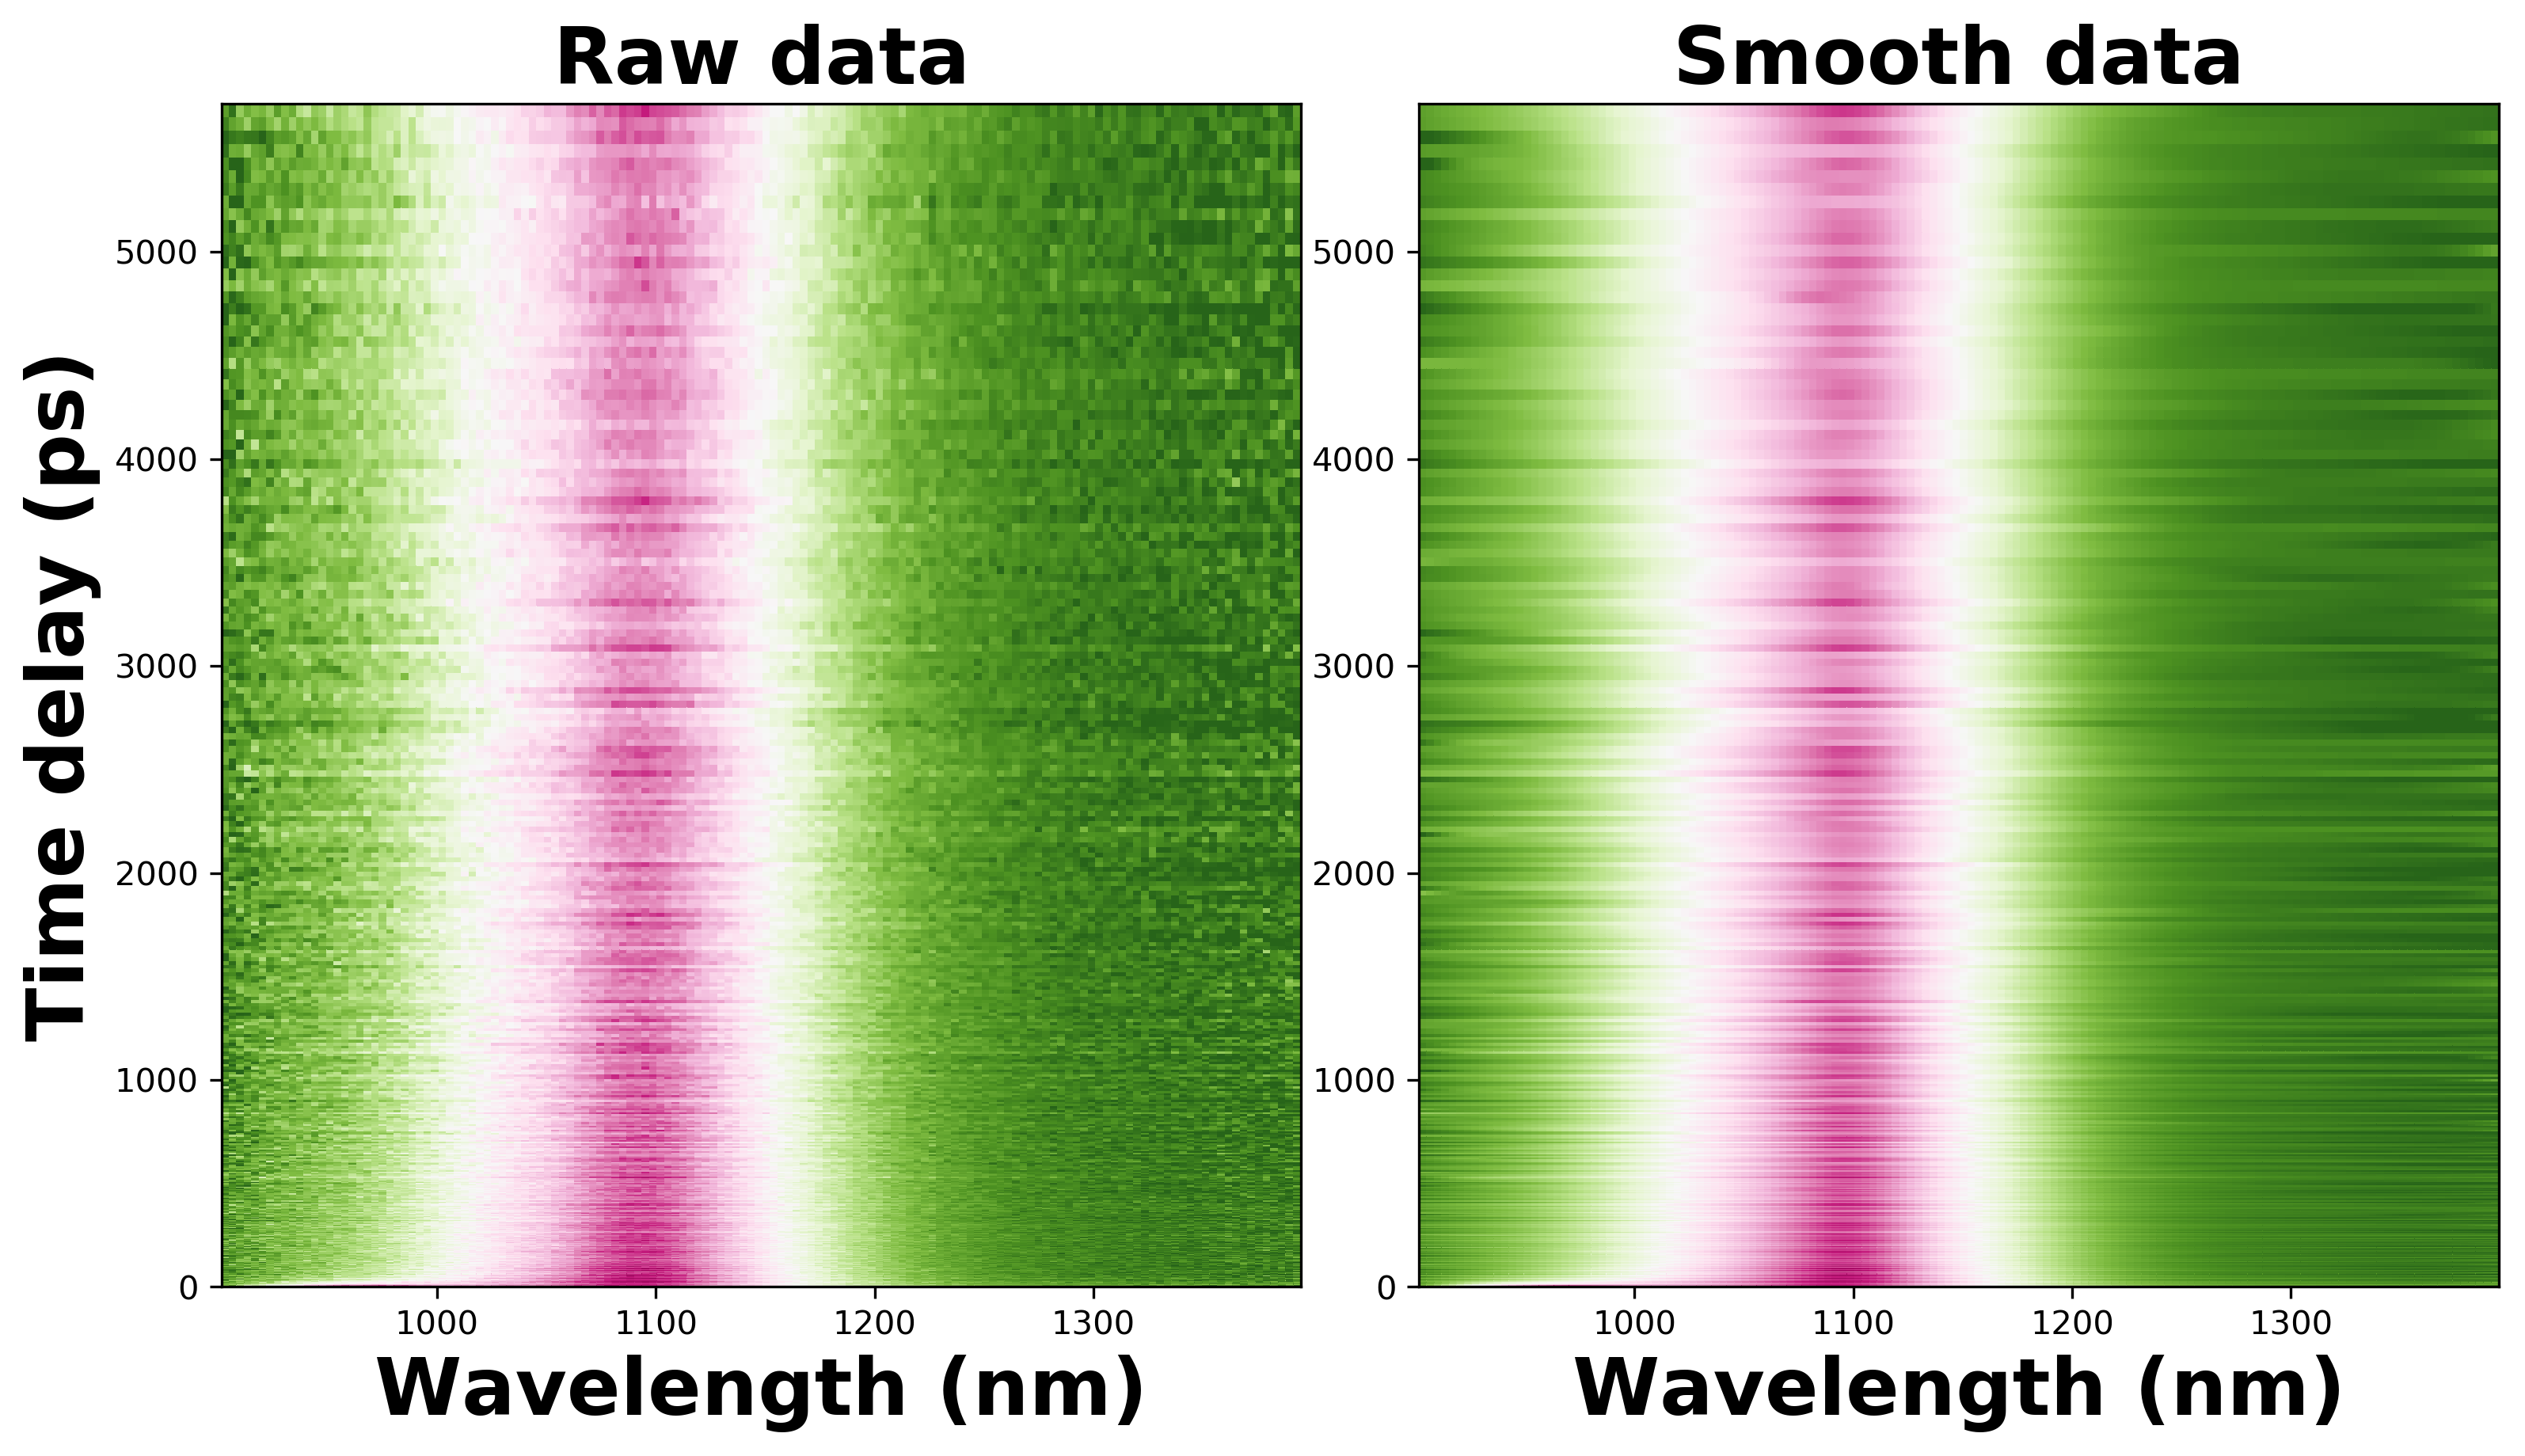

In [16]:
import numpy as np
import matplotlib.pyplot as plt
#contour plot of original data BEFORE smoothing
original_contour = twodcontourplot(nm, time, z)
nm_contour, time_contour, min_contour, max_contour = original_contour[0], original_contour[1], original_contour[2], original_contour[3]
fs = 24
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10.5, 6), dpi = 300)
ax1.set_title('Raw data', fontsize = fs, fontweight = 'bold')
ax1.set_xlabel('Wavelength (nm)', fontsize = fs, fontweight = 'bold')
ax1.set_ylabel('Time delay (ps)', fontsize = fs, fontweight = 'bold')
plt.xlabel('Wavelength (nm)', fontsize = fs, fontweight = 'bold')
ax1.pcolormesh(nm_contour, time_contour, z, cmap = 'PiYG', vmin=min_contour/2.5, vmax=max_contour/10)

#contour plot of data AFTER smoothing
smooth_contour = twodcontourplot(nm, time, z_smooth)    
nm_contour, time_contour, min_contour, max_contour = smooth_contour[0], smooth_contour[1], smooth_contour[2], smooth_contour[3]
    
ax2.set_title('Smooth data', fontsize = fs, fontweight = 'bold')
ax2.pcolormesh(nm_contour, time_contour, z_smooth, cmap = 'PiYG', vmin=min_contour/2.5, vmax=max_contour/10)
plt.tight_layout(pad=0.25, h_pad=None, w_pad=None, rect=None)
plt.show()

In [ ]:
idx, height, fwhm = peak_matrix(nm, z, threshold, min_dist)